<a href="https://colab.research.google.com/github/SahilCarterr/Ip_Adapter-Upscaling/blob/Code_Updates/Upscale_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade diffusers accelerate transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

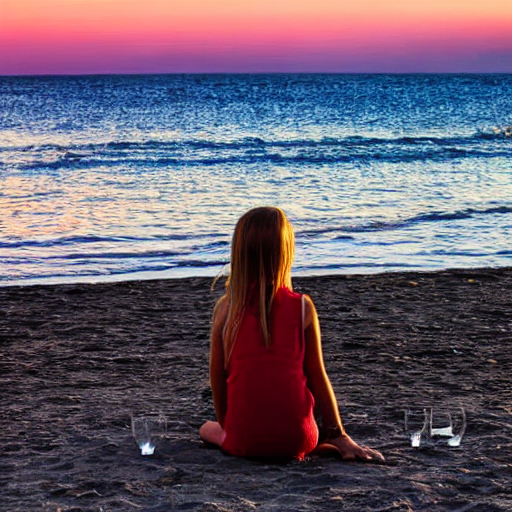

In [7]:
from diffusers import StableDiffusionLatentUpscalePipeline, StableDiffusionPipeline
import torch


pipeline = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16
)
pipeline.to("cuda")

model_id = "stabilityai/sd-x2-latent-upscaler"
upscaler = StableDiffusionLatentUpscalePipeline.from_pretrained(model_id, torch_dtype=torch.float16)
upscaler.to("cuda")

prompt = "a girl sitting on the beach with wine glass"
generator = torch.manual_seed(33)

low_res_latents = pipeline(prompt, generator=generator, output_type="latent").images

with torch.no_grad():
    image = pipeline.decode_latents(low_res_latents)
image = pipeline.numpy_to_pil(image)[0]

image.save("output.png")
image

  0%|          | 0/20 [00:00<?, ?it/s]

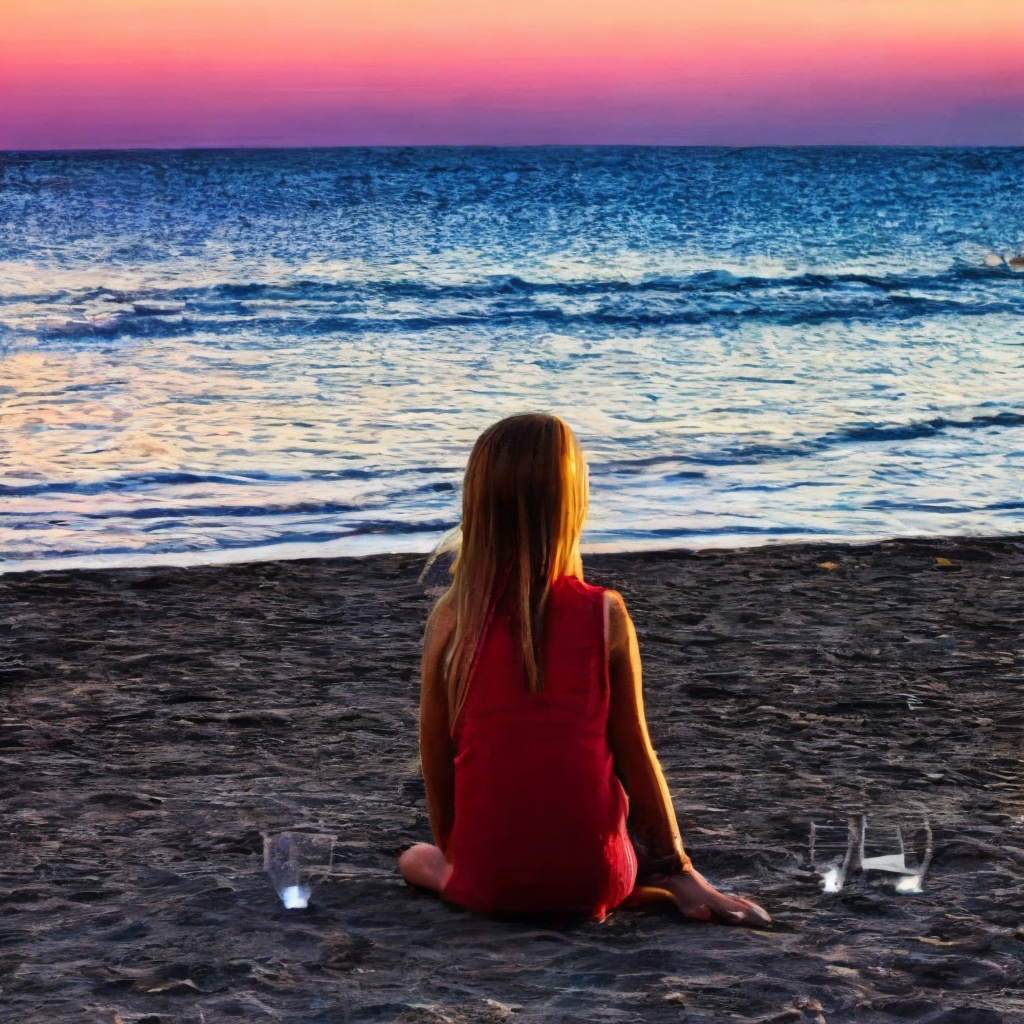

In [8]:

upscaled_image = upscaler(
    prompt=prompt,
    image=low_res_latents,
    num_inference_steps=20,
    guidance_scale=0,
    generator=generator,
).images[0]

upscaled_image.save("upscaled.png")
upscaled_image